# project 2 

## 손수 설계하는 선형회귀,당뇨병 수치 맞춰보자


## 목차

### 1.선형회귀란?
### 2.diabetes dataset 소개
### 3.model 
### 4.gradient descent
### 5.Learning Rate
### 6.train model
### 7.performance test / visualization


### 선형회귀란?

#### 회귀와 분류
일반적으로 머신러닝과 딥러닝에서 크게  회귀(Regression)/분류(Classification) 로 분류가 된다.
회귀란 연속된 실수 값을 예측할때,즉 실수 데이터를 입력받아 실수값으로 추정값을 표현할때 사용되며
분류란 이미지 데이이터를 입력받아 해당사진이 무엇인지 구별해내는 것을 말한다.

#### 선형회귀
선형회귀란 선형 방정식을 활용해 원하는 값을 예측하는 모델을 설계, 학습 시키는 것 이라고 책에는 쓰여있지만 
이해가 잘 되지 않는다.
먼저 머신러닝의 가장 큰 목적은 실제 데이터로 모델을 생성해 다른 입력값이 넣었을때 발생하는 결과값을 예측하는것이다.
우리가 가장 쉽게 접할수 있는 그래프는 선(line)그래프이다. 
따라서 데이터를 그래프에 펼쳐놓고 이 데이터를 가장 잘 설명하는 선(line) 하나를 찾아가는 것을 
선형회귀(Linear Regression)이라고 한다. 



### diabetes dataset 
sklearn에서 제공하는 diabetes dataset에대해 알아봅니다.

In [247]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(dir(diabetes),'\n\n')

data = diabetes.data 
data_name = diabetes.data_filename
module = diabetes.data_module
target = diabetes.target
target_name = diabetes.target_filename
print(data.shape,'\n\n')
print(data_name,'\n\n')
print(module,'\n\n')
print(target_name,'\n\n')
print(target.shape,'\n\n')

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename'] 


(442, 10) 


diabetes_data.csv.gz 


sklearn.datasets.data 


diabetes_target.csv.gz 


(442,) 




diabetes dataset에 담긴 정보의 종류를 확인해보았습니다.
'DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename'
총 8개의 정보가 들어있었고, data의 형태는 442개의 데이터가 각각 10개씩 정보를 담고 있는걸 확인했습니다.
또한 dataset_name/target_filename은 전에 실습했던것과는 다르게 csv파일에 저장이 되어있었습니다.

In [248]:
df_x = data
df_y = target
print(df_x,'\n\n')
print(df_y)
type(df_x)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]] 


[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  8

numpy.ndarray

In [249]:
type(df_y)

numpy.ndarray

#### df_x , df_y에 ndarray형식으로 저장을 한 뒤

In [250]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, 
                                                    df_y, 
                                                    test_size=0.4, 
                                                    random_state=32)

#### train_test_split 함수로 데이터를 분리했습니다.

### Model
먼저 입력데이터 개수에 맞는 가중치 w와 y절편으로 공부했던 bias b값을 준비해준다.
위에 확있했다시피 442개의 데이터가 10개씩 정보를 담고있는걸 확인하였다.
따라서 w는 10개로 지정하고 b는 1개로 지정해준다.
그 후 모델 함수를 구현한다.

In [251]:
import numpy as np
X = df_x
y = df_y
W = np.random.rand(10)
b = np.random.rand()

In [252]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

#### 손실함수(Loss Function)
손실함수 또는 비용함수(Cost Function)이라고도 불리는 이 함수는 모델을 평가하는 방법으로, 실제 값과 예측값에 대한 오차를 구하기 위해 사용된다.
손실함수는 평균제곱오차(Mean Squared Error,MSE)와 교차 엔트로피 오차(Cross Entropy Error,CEE)가 자주 사용된다.
본 프로젝트에선 MSE가 사용되었다.

In [253]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean() 
    return mse

In [254]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

#### Gradient Descent
경사하강법(Gradient Descent)은 기본적인 함수 최적화 중 하나이다.
여기서 최적화란 함수의 최대값 또는 최소값을 찾는것이다.
위에 설명하듯이 모델을 평가하는 방법으로 손실함수를 사용하는 방법이 있다.예를 들어 선형회귀 모델에서는 MSE를 통해 
모델을 평가하는데 MSE의 최소값이 최적의 모델이 된다.이때 MSE최소값은 MSE를 미분하여 기울기가 0벡터가 되는 지점을 찾았다
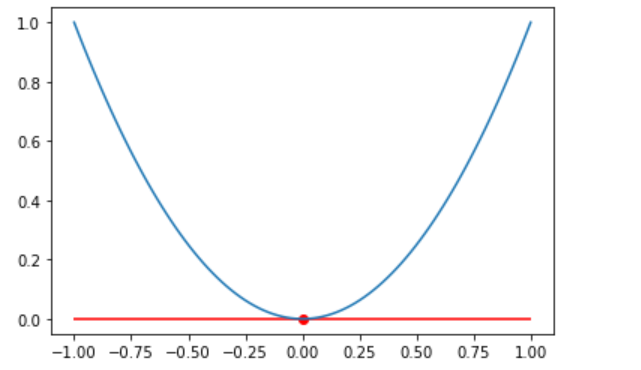

이 경우 손실함수가 이차함수로 비교적 단순해 미분값이 0인 지점을 기준으로 최소값을 찾을수 있지만 
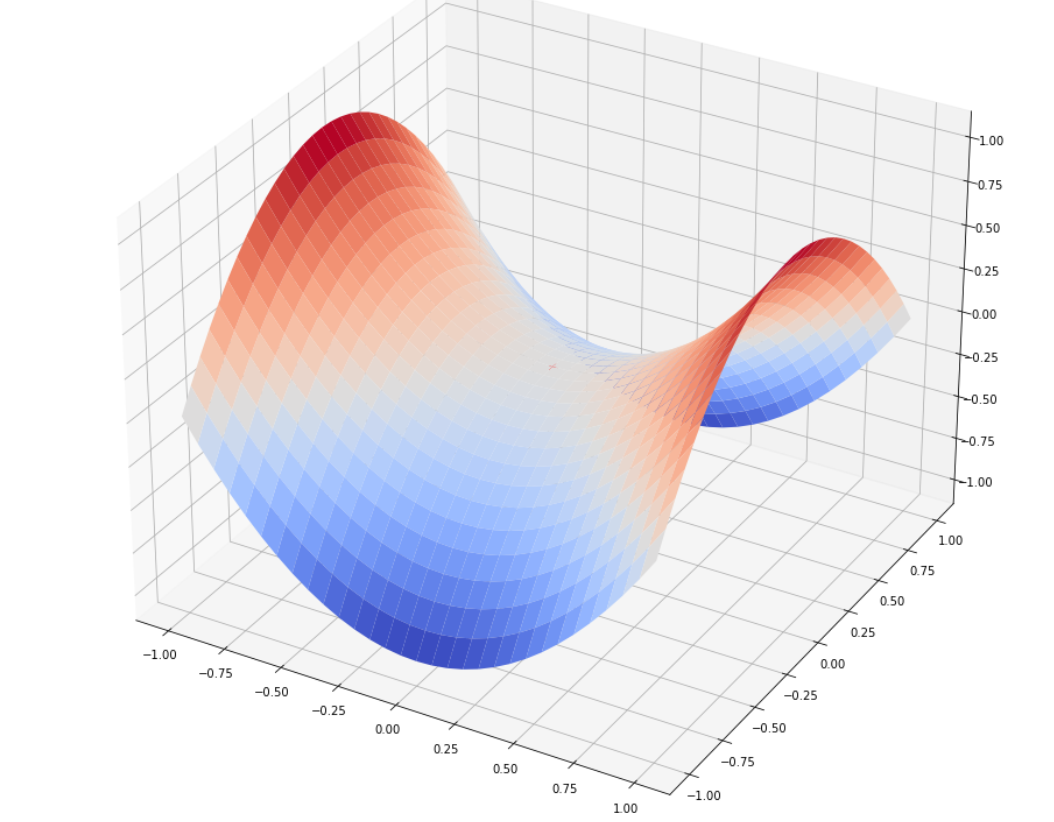\
x축과 z축은 z=x^2 관계에 있고 y축과z축은 z = -y^2 관계에 있일때 (0,0,0)에서 기울기는 0벡터가 된다.
그러나 x와 z의 관계에서는 최소값이지만 y와 z의 관계에서는 최대값이 된다.
이러한 지점을 안장점(saddle point)라고 하는데 안장점이 최적화된 지점이라고 볼수 없다.

In [255]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [256]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.53626481  -13.81653856 -189.57879753 -142.71529376  -68.25832715
  -55.97748951  127.67845311 -139.01152982 -182.90736304 -123.53855593]
db: -303.30090642096025


#### Learning Rate
말 그대로 학습률이다.특정 가중치 값 W가 주어졌을때 기울기에 Learning Rate를 곱해 그다음 가중치를 결정하게 되는데,
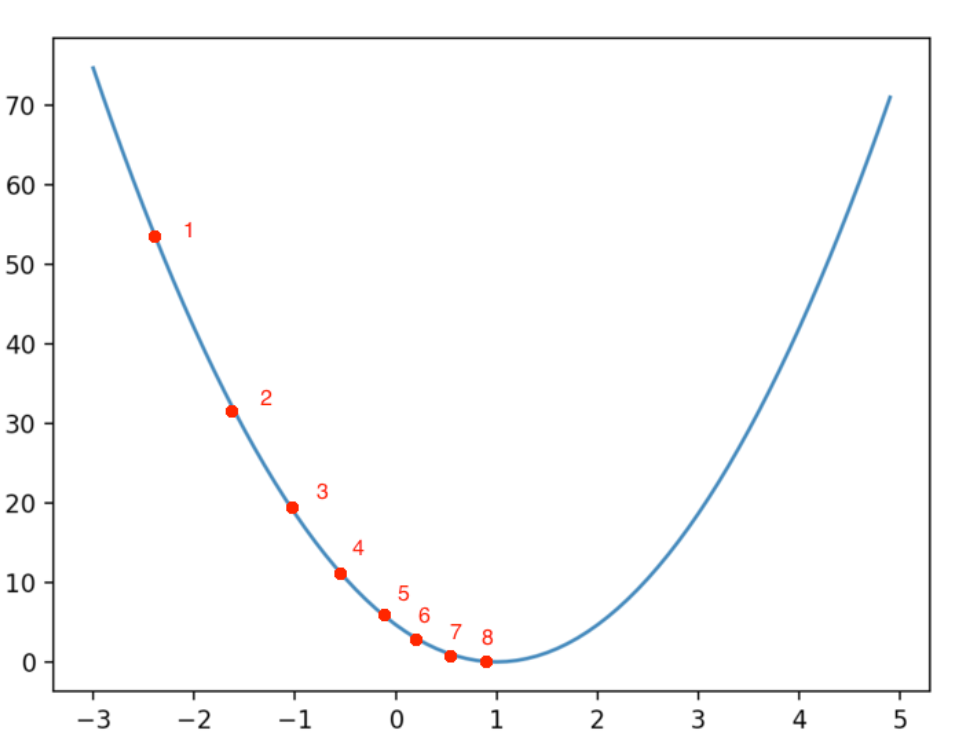
이와 같은 경사하강법 알고리즘 추적 순서를 예를 들어본다.

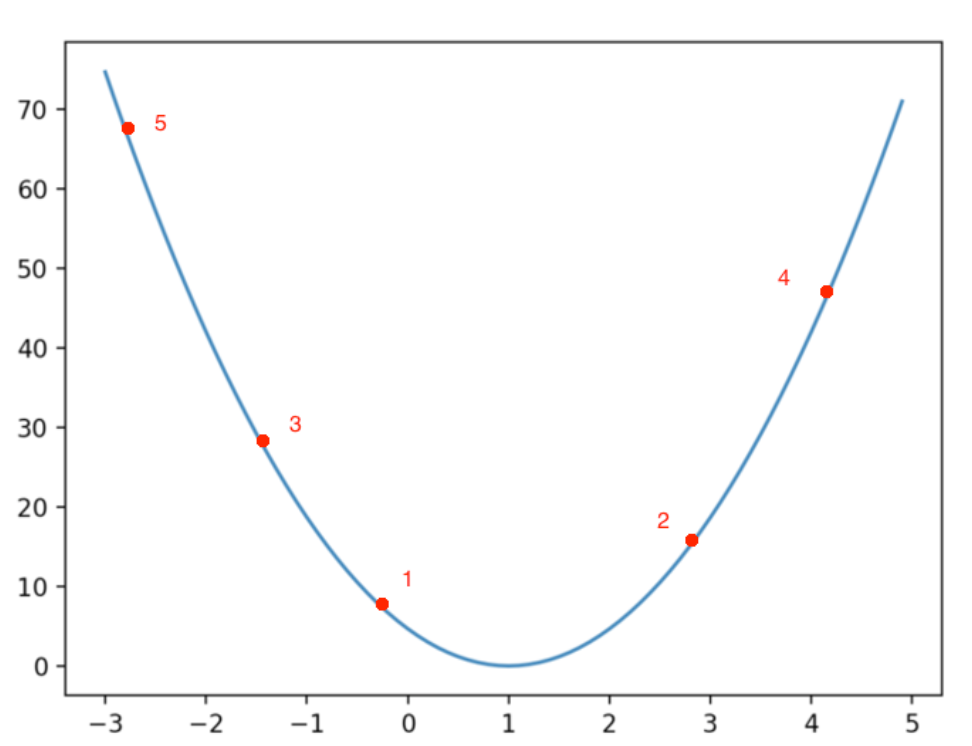
이처럼 기울기가 음수라 경사하강법 알고리즘에 의해 W를 증가시켜야 했지만, 기울게이 곱해주는 Learning Rate가 너무 커서 3만큼 증가했다.3만큼 증가해 기울기가 양수가 되어 W를 감소시켰는데 너무 큰 Learning Rate값 때문에 3번 자리까지 이동해 버렸다.
따라서 Learning Rate가 적절한 값보다 큰경우 지속적으로 부정확한 값으로 학습이 되버려 최종적으로 엉망이 된 학습이 된다.이 경우를 Overshooting이라고 한다.

반대로 너무 작은 값으로 설정했을 경우 너무 많은 반복(iteration)을 수행해야 한다.따라서 학습속도가 너무 느려지게 된다.
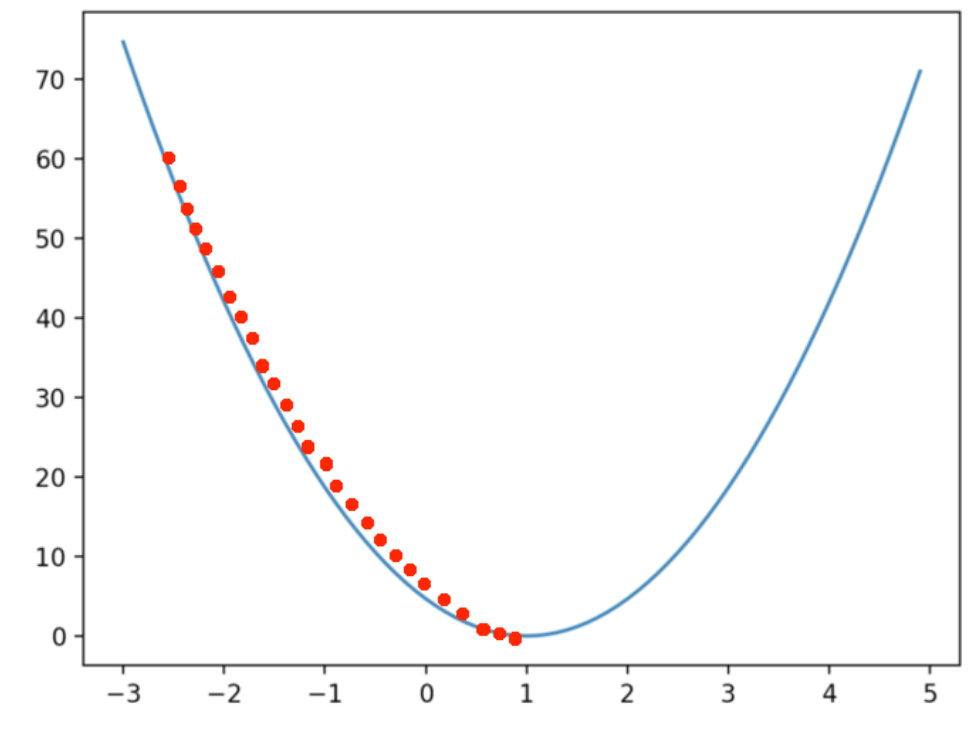

In [257]:
lr= 0.0001

In [258]:
losses = []

for i in range(1, 100000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= lr * dW
    b -= lr * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 29686.4372
Iteration 20 : Loss 29591.8940
Iteration 30 : Loss 29497.7210
Iteration 40 : Loss 29403.9169
Iteration 50 : Loss 29310.4801
Iteration 60 : Loss 29217.4092
Iteration 70 : Loss 29124.7027
Iteration 80 : Loss 29032.3592
Iteration 90 : Loss 28940.3773
Iteration 100 : Loss 28848.7554
Iteration 110 : Loss 28757.4922
Iteration 120 : Loss 28666.5862
Iteration 130 : Loss 28576.0361
Iteration 140 : Loss 28485.8403
Iteration 150 : Loss 28395.9975
Iteration 160 : Loss 28306.5063
Iteration 170 : Loss 28217.3653
Iteration 180 : Loss 28128.5731
Iteration 190 : Loss 28040.1283
Iteration 200 : Loss 27952.0295
Iteration 210 : Loss 27864.2753
Iteration 220 : Loss 27776.8645
Iteration 230 : Loss 27689.7955
Iteration 240 : Loss 27603.0671
Iteration 250 : Loss 27516.6778
Iteration 260 : Loss 27430.6265
Iteration 270 : Loss 27344.9116
Iteration 280 : Loss 27259.5318
Iteration 290 : Loss 27174.4859
Iteration 300 : Loss 27089.7725
Iteration 310 : Loss 27005.3903
Iteration 320 : L

Iteration 3170 : Loss 12468.9698
Iteration 3180 : Loss 12441.1334
Iteration 3190 : Loss 12413.4023
Iteration 3200 : Loss 12385.7763
Iteration 3210 : Loss 12358.2549
Iteration 3220 : Loss 12330.8376
Iteration 3230 : Loss 12303.5240
Iteration 3240 : Loss 12276.3138
Iteration 3250 : Loss 12249.2066
Iteration 3260 : Loss 12222.2018
Iteration 3270 : Loss 12195.2992
Iteration 3280 : Loss 12168.4983
Iteration 3290 : Loss 12141.7987
Iteration 3300 : Loss 12115.2000
Iteration 3310 : Loss 12088.7019
Iteration 3320 : Loss 12062.3038
Iteration 3330 : Loss 12036.0055
Iteration 3340 : Loss 12009.8065
Iteration 3350 : Loss 11983.7065
Iteration 3360 : Loss 11957.7050
Iteration 3370 : Loss 11931.8016
Iteration 3380 : Loss 11905.9961
Iteration 3390 : Loss 11880.2879
Iteration 3400 : Loss 11854.6767
Iteration 3410 : Loss 11829.1621
Iteration 3420 : Loss 11803.7437
Iteration 3430 : Loss 11778.4212
Iteration 3440 : Loss 11753.1942
Iteration 3450 : Loss 11728.0623
Iteration 3460 : Loss 11703.0251
Iteration 

Iteration 8380 : Loss 5988.0675
Iteration 8390 : Loss 5983.6227
Iteration 8400 : Loss 5979.1918
Iteration 8410 : Loss 5974.7746
Iteration 8420 : Loss 5970.3712
Iteration 8430 : Loss 5965.9814
Iteration 8440 : Loss 5961.6053
Iteration 8450 : Loss 5957.2427
Iteration 8460 : Loss 5952.8936
Iteration 8470 : Loss 5948.5580
Iteration 8480 : Loss 5944.2358
Iteration 8490 : Loss 5939.9270
Iteration 8500 : Loss 5935.6315
Iteration 8510 : Loss 5931.3492
Iteration 8520 : Loss 5927.0801
Iteration 8530 : Loss 5922.8242
Iteration 8540 : Loss 5918.5815
Iteration 8550 : Loss 5914.3517
Iteration 8560 : Loss 5910.1350
Iteration 8570 : Loss 5905.9313
Iteration 8580 : Loss 5901.7404
Iteration 8590 : Loss 5897.5625
Iteration 8600 : Loss 5893.3973
Iteration 8610 : Loss 5889.2449
Iteration 8620 : Loss 5885.1052
Iteration 8630 : Loss 5880.9782
Iteration 8640 : Loss 5876.8638
Iteration 8650 : Loss 5872.7620
Iteration 8660 : Loss 5868.6728
Iteration 8670 : Loss 5864.5960
Iteration 8680 : Loss 5860.5316
Iteratio

Iteration 11290 : Loss 5113.9924
Iteration 11300 : Loss 5112.0060
Iteration 11310 : Loss 5110.0244
Iteration 11320 : Loss 5108.0475
Iteration 11330 : Loss 5106.0753
Iteration 11340 : Loss 5104.1078
Iteration 11350 : Loss 5102.1449
Iteration 11360 : Loss 5100.1867
Iteration 11370 : Loss 5098.2331
Iteration 11380 : Loss 5096.2842
Iteration 11390 : Loss 5094.3399
Iteration 11400 : Loss 5092.4001
Iteration 11410 : Loss 5090.4649
Iteration 11420 : Loss 5088.5343
Iteration 11430 : Loss 5086.6082
Iteration 11440 : Loss 5084.6867
Iteration 11450 : Loss 5082.7696
Iteration 11460 : Loss 5080.8571
Iteration 11470 : Loss 5078.9490
Iteration 11480 : Loss 5077.0454
Iteration 11490 : Loss 5075.1462
Iteration 11500 : Loss 5073.2515
Iteration 11510 : Loss 5071.3611
Iteration 11520 : Loss 5069.4752
Iteration 11530 : Loss 5067.5937
Iteration 11540 : Loss 5065.7165
Iteration 11550 : Loss 5063.8437
Iteration 11560 : Loss 5061.9752
Iteration 11570 : Loss 5060.1110
Iteration 11580 : Loss 5058.2512
Iteration 

Iteration 17650 : Loss 4379.7730
Iteration 17660 : Loss 4379.0643
Iteration 17670 : Loss 4378.3563
Iteration 17680 : Loss 4377.6490
Iteration 17690 : Loss 4376.9424
Iteration 17700 : Loss 4376.2365
Iteration 17710 : Loss 4375.5314
Iteration 17720 : Loss 4374.8270
Iteration 17730 : Loss 4374.1234
Iteration 17740 : Loss 4373.4204
Iteration 17750 : Loss 4372.7182
Iteration 17760 : Loss 4372.0166
Iteration 17770 : Loss 4371.3158
Iteration 17780 : Loss 4370.6158
Iteration 17790 : Loss 4369.9164
Iteration 17800 : Loss 4369.2177
Iteration 17810 : Loss 4368.5197
Iteration 17820 : Loss 4367.8225
Iteration 17830 : Loss 4367.1260
Iteration 17840 : Loss 4366.4301
Iteration 17850 : Loss 4365.7350
Iteration 17860 : Loss 4365.0405
Iteration 17870 : Loss 4364.3468
Iteration 17880 : Loss 4363.6538
Iteration 17890 : Loss 4362.9614
Iteration 17900 : Loss 4362.2698
Iteration 17910 : Loss 4361.5788
Iteration 17920 : Loss 4360.8886
Iteration 17930 : Loss 4360.1990
Iteration 17940 : Loss 4359.5101
Iteration 

Iteration 21430 : Loss 4153.0889
Iteration 21440 : Loss 4152.5770
Iteration 21450 : Loss 4152.0654
Iteration 21460 : Loss 4151.5542
Iteration 21470 : Loss 4151.0433
Iteration 21480 : Loss 4150.5329
Iteration 21490 : Loss 4150.0228
Iteration 21500 : Loss 4149.5131
Iteration 21510 : Loss 4149.0037
Iteration 21520 : Loss 4148.4948
Iteration 21530 : Loss 4147.9862
Iteration 21540 : Loss 4147.4779
Iteration 21550 : Loss 4146.9701
Iteration 21560 : Loss 4146.4626
Iteration 21570 : Loss 4145.9555
Iteration 21580 : Loss 4145.4487
Iteration 21590 : Loss 4144.9423
Iteration 21600 : Loss 4144.4363
Iteration 21610 : Loss 4143.9307
Iteration 21620 : Loss 4143.4254
Iteration 21630 : Loss 4142.9205
Iteration 21640 : Loss 4142.4159
Iteration 21650 : Loss 4141.9118
Iteration 21660 : Loss 4141.4079
Iteration 21670 : Loss 4140.9045
Iteration 21680 : Loss 4140.4014
Iteration 21690 : Loss 4139.8987
Iteration 21700 : Loss 4139.3963
Iteration 21710 : Loss 4138.8943
Iteration 21720 : Loss 4138.3927
Iteration 

Iteration 25400 : Loss 3975.0219
Iteration 25410 : Loss 3974.6282
Iteration 25420 : Loss 3974.2347
Iteration 25430 : Loss 3973.8415
Iteration 25440 : Loss 3973.4485
Iteration 25450 : Loss 3973.0557
Iteration 25460 : Loss 3972.6632
Iteration 25470 : Loss 3972.2709
Iteration 25480 : Loss 3971.8789
Iteration 25490 : Loss 3971.4871
Iteration 25500 : Loss 3971.0956
Iteration 25510 : Loss 3970.7042
Iteration 25520 : Loss 3970.3131
Iteration 25530 : Loss 3969.9223
Iteration 25540 : Loss 3969.5317
Iteration 25550 : Loss 3969.1413
Iteration 25560 : Loss 3968.7511
Iteration 25570 : Loss 3968.3612
Iteration 25580 : Loss 3967.9716
Iteration 25590 : Loss 3967.5821
Iteration 25600 : Loss 3967.1929
Iteration 25610 : Loss 3966.8040
Iteration 25620 : Loss 3966.4152
Iteration 25630 : Loss 3966.0267
Iteration 25640 : Loss 3965.6385
Iteration 25650 : Loss 3965.2504
Iteration 25660 : Loss 3964.8626
Iteration 25670 : Loss 3964.4751
Iteration 25680 : Loss 3964.0877
Iteration 25690 : Loss 3963.7006
Iteration 

Iteration 32340 : Loss 3749.2045
Iteration 32350 : Loss 3748.9360
Iteration 32360 : Loss 3748.6676
Iteration 32370 : Loss 3748.3993
Iteration 32380 : Loss 3748.1312
Iteration 32390 : Loss 3747.8632
Iteration 32400 : Loss 3747.5953
Iteration 32410 : Loss 3747.3276
Iteration 32420 : Loss 3747.0600
Iteration 32430 : Loss 3746.7926
Iteration 32440 : Loss 3746.5252
Iteration 32450 : Loss 3746.2581
Iteration 32460 : Loss 3745.9910
Iteration 32470 : Loss 3745.7241
Iteration 32480 : Loss 3745.4573
Iteration 32490 : Loss 3745.1907
Iteration 32500 : Loss 3744.9242
Iteration 32510 : Loss 3744.6578
Iteration 32520 : Loss 3744.3915
Iteration 32530 : Loss 3744.1254
Iteration 32540 : Loss 3743.8595
Iteration 32550 : Loss 3743.5936
Iteration 32560 : Loss 3743.3279
Iteration 32570 : Loss 3743.0624
Iteration 32580 : Loss 3742.7969
Iteration 32590 : Loss 3742.5316
Iteration 32600 : Loss 3742.2664
Iteration 32610 : Loss 3742.0014
Iteration 32620 : Loss 3741.7365
Iteration 32630 : Loss 3741.4717
Iteration 

Iteration 38330 : Loss 3609.6616
Iteration 38340 : Loss 3609.4599
Iteration 38350 : Loss 3609.2582
Iteration 38360 : Loss 3609.0566
Iteration 38370 : Loss 3608.8551
Iteration 38380 : Loss 3608.6537
Iteration 38390 : Loss 3608.4524
Iteration 38400 : Loss 3608.2511
Iteration 38410 : Loss 3608.0500
Iteration 38420 : Loss 3607.8489
Iteration 38430 : Loss 3607.6480
Iteration 38440 : Loss 3607.4471
Iteration 38450 : Loss 3607.2463
Iteration 38460 : Loss 3607.0456
Iteration 38470 : Loss 3606.8450
Iteration 38480 : Loss 3606.6445
Iteration 38490 : Loss 3606.4441
Iteration 38500 : Loss 3606.2438
Iteration 38510 : Loss 3606.0435
Iteration 38520 : Loss 3605.8434
Iteration 38530 : Loss 3605.6433
Iteration 38540 : Loss 3605.4434
Iteration 38550 : Loss 3605.2435
Iteration 38560 : Loss 3605.0437
Iteration 38570 : Loss 3604.8440
Iteration 38580 : Loss 3604.6444
Iteration 38590 : Loss 3604.4449
Iteration 38600 : Loss 3604.2454
Iteration 38610 : Loss 3604.0461
Iteration 38620 : Loss 3603.8468
Iteration 

Iteration 42890 : Loss 3526.2307
Iteration 42900 : Loss 3526.0649
Iteration 42910 : Loss 3525.8992
Iteration 42920 : Loss 3525.7336
Iteration 42930 : Loss 3525.5681
Iteration 42940 : Loss 3525.4026
Iteration 42950 : Loss 3525.2372
Iteration 42960 : Loss 3525.0718
Iteration 42970 : Loss 3524.9066
Iteration 42980 : Loss 3524.7414
Iteration 42990 : Loss 3524.5762
Iteration 43000 : Loss 3524.4112
Iteration 43010 : Loss 3524.2462
Iteration 43020 : Loss 3524.0812
Iteration 43030 : Loss 3523.9164
Iteration 43040 : Loss 3523.7516
Iteration 43050 : Loss 3523.5868
Iteration 43060 : Loss 3523.4222
Iteration 43070 : Loss 3523.2576
Iteration 43080 : Loss 3523.0931
Iteration 43090 : Loss 3522.9286
Iteration 43100 : Loss 3522.7642
Iteration 43110 : Loss 3522.5999
Iteration 43120 : Loss 3522.4356
Iteration 43130 : Loss 3522.2714
Iteration 43140 : Loss 3522.1073
Iteration 43150 : Loss 3521.9433
Iteration 43160 : Loss 3521.7793
Iteration 43170 : Loss 3521.6154
Iteration 43180 : Loss 3521.4515
Iteration 

Iteration 52650 : Loss 3391.8409
Iteration 52660 : Loss 3391.7268
Iteration 52670 : Loss 3391.6128
Iteration 52680 : Loss 3391.4988
Iteration 52690 : Loss 3391.3848
Iteration 52700 : Loss 3391.2708
Iteration 52710 : Loss 3391.1569
Iteration 52720 : Loss 3391.0431
Iteration 52730 : Loss 3390.9293
Iteration 52740 : Loss 3390.8155
Iteration 52750 : Loss 3390.7018
Iteration 52760 : Loss 3390.5881
Iteration 52770 : Loss 3390.4744
Iteration 52780 : Loss 3390.3608
Iteration 52790 : Loss 3390.2473
Iteration 52800 : Loss 3390.1337
Iteration 52810 : Loss 3390.0202
Iteration 52820 : Loss 3389.9068
Iteration 52830 : Loss 3389.7934
Iteration 52840 : Loss 3389.6800
Iteration 52850 : Loss 3389.5667
Iteration 52860 : Loss 3389.4534
Iteration 52870 : Loss 3389.3401
Iteration 52880 : Loss 3389.2269
Iteration 52890 : Loss 3389.1138
Iteration 52900 : Loss 3389.0006
Iteration 52910 : Loss 3388.8875
Iteration 52920 : Loss 3388.7745
Iteration 52930 : Loss 3388.6615
Iteration 52940 : Loss 3388.5485
Iteration 

Iteration 57330 : Loss 3342.5632
Iteration 57340 : Loss 3342.4661
Iteration 57350 : Loss 3342.3691
Iteration 57360 : Loss 3342.2721
Iteration 57370 : Loss 3342.1751
Iteration 57380 : Loss 3342.0782
Iteration 57390 : Loss 3341.9812
Iteration 57400 : Loss 3341.8844
Iteration 57410 : Loss 3341.7875
Iteration 57420 : Loss 3341.6907
Iteration 57430 : Loss 3341.5939
Iteration 57440 : Loss 3341.4971
Iteration 57450 : Loss 3341.4004
Iteration 57460 : Loss 3341.3037
Iteration 57470 : Loss 3341.2071
Iteration 57480 : Loss 3341.1105
Iteration 57490 : Loss 3341.0139
Iteration 57500 : Loss 3340.9173
Iteration 57510 : Loss 3340.8208
Iteration 57520 : Loss 3340.7243
Iteration 57530 : Loss 3340.6278
Iteration 57540 : Loss 3340.5314
Iteration 57550 : Loss 3340.4350
Iteration 57560 : Loss 3340.3386
Iteration 57570 : Loss 3340.2423
Iteration 57580 : Loss 3340.1460
Iteration 57590 : Loss 3340.0497
Iteration 57600 : Loss 3339.9535
Iteration 57610 : Loss 3339.8573
Iteration 57620 : Loss 3339.7611
Iteration 

Iteration 61400 : Loss 3305.5893
Iteration 61410 : Loss 3305.5043
Iteration 61420 : Loss 3305.4194
Iteration 61430 : Loss 3305.3345
Iteration 61440 : Loss 3305.2497
Iteration 61450 : Loss 3305.1649
Iteration 61460 : Loss 3305.0801
Iteration 61470 : Loss 3304.9953
Iteration 61480 : Loss 3304.9105
Iteration 61490 : Loss 3304.8258
Iteration 61500 : Loss 3304.7411
Iteration 61510 : Loss 3304.6565
Iteration 61520 : Loss 3304.5718
Iteration 61530 : Loss 3304.4872
Iteration 61540 : Loss 3304.4026
Iteration 61550 : Loss 3304.3181
Iteration 61560 : Loss 3304.2335
Iteration 61570 : Loss 3304.1490
Iteration 61580 : Loss 3304.0646
Iteration 61590 : Loss 3303.9801
Iteration 61600 : Loss 3303.8957
Iteration 61610 : Loss 3303.8113
Iteration 61620 : Loss 3303.7269
Iteration 61630 : Loss 3303.6426
Iteration 61640 : Loss 3303.5583
Iteration 61650 : Loss 3303.4740
Iteration 61660 : Loss 3303.3897
Iteration 61670 : Loss 3303.3055
Iteration 61680 : Loss 3303.2213
Iteration 61690 : Loss 3303.1371
Iteration 

Iteration 66740 : Loss 3263.8497
Iteration 66750 : Loss 3263.7778
Iteration 66760 : Loss 3263.7060
Iteration 66770 : Loss 3263.6342
Iteration 66780 : Loss 3263.5625
Iteration 66790 : Loss 3263.4907
Iteration 66800 : Loss 3263.4190
Iteration 66810 : Loss 3263.3473
Iteration 66820 : Loss 3263.2756
Iteration 66830 : Loss 3263.2040
Iteration 66840 : Loss 3263.1323
Iteration 66850 : Loss 3263.0607
Iteration 66860 : Loss 3262.9891
Iteration 66870 : Loss 3262.9176
Iteration 66880 : Loss 3262.8460
Iteration 66890 : Loss 3262.7745
Iteration 66900 : Loss 3262.7030
Iteration 66910 : Loss 3262.6315
Iteration 66920 : Loss 3262.5601
Iteration 66930 : Loss 3262.4886
Iteration 66940 : Loss 3262.4172
Iteration 66950 : Loss 3262.3458
Iteration 66960 : Loss 3262.2745
Iteration 66970 : Loss 3262.2031
Iteration 66980 : Loss 3262.1318
Iteration 66990 : Loss 3262.0605
Iteration 67000 : Loss 3261.9892
Iteration 67010 : Loss 3261.9179
Iteration 67020 : Loss 3261.8467
Iteration 67030 : Loss 3261.7755
Iteration 

Iteration 71320 : Loss 3233.1307
Iteration 71330 : Loss 3233.0681
Iteration 71340 : Loss 3233.0056
Iteration 71350 : Loss 3232.9431
Iteration 71360 : Loss 3232.8806
Iteration 71370 : Loss 3232.8181
Iteration 71380 : Loss 3232.7556
Iteration 71390 : Loss 3232.6932
Iteration 71400 : Loss 3232.6308
Iteration 71410 : Loss 3232.5684
Iteration 71420 : Loss 3232.5060
Iteration 71430 : Loss 3232.4436
Iteration 71440 : Loss 3232.3812
Iteration 71450 : Loss 3232.3189
Iteration 71460 : Loss 3232.2566
Iteration 71470 : Loss 3232.1943
Iteration 71480 : Loss 3232.1320
Iteration 71490 : Loss 3232.0698
Iteration 71500 : Loss 3232.0075
Iteration 71510 : Loss 3231.9453
Iteration 71520 : Loss 3231.8831
Iteration 71530 : Loss 3231.8209
Iteration 71540 : Loss 3231.7588
Iteration 71550 : Loss 3231.6966
Iteration 71560 : Loss 3231.6345
Iteration 71570 : Loss 3231.5724
Iteration 71580 : Loss 3231.5103
Iteration 71590 : Loss 3231.4482
Iteration 71600 : Loss 3231.3861
Iteration 71610 : Loss 3231.3241
Iteration 

Iteration 75050 : Loss 3211.0327
Iteration 75060 : Loss 3210.9766
Iteration 75070 : Loss 3210.9206
Iteration 75080 : Loss 3210.8646
Iteration 75090 : Loss 3210.8086
Iteration 75100 : Loss 3210.7526
Iteration 75110 : Loss 3210.6966
Iteration 75120 : Loss 3210.6406
Iteration 75130 : Loss 3210.5847
Iteration 75140 : Loss 3210.5288
Iteration 75150 : Loss 3210.4728
Iteration 75160 : Loss 3210.4169
Iteration 75170 : Loss 3210.3611
Iteration 75180 : Loss 3210.3052
Iteration 75190 : Loss 3210.2494
Iteration 75200 : Loss 3210.1935
Iteration 75210 : Loss 3210.1377
Iteration 75220 : Loss 3210.0819
Iteration 75230 : Loss 3210.0261
Iteration 75240 : Loss 3209.9704
Iteration 75250 : Loss 3209.9146
Iteration 75260 : Loss 3209.8589
Iteration 75270 : Loss 3209.8032
Iteration 75280 : Loss 3209.7475
Iteration 75290 : Loss 3209.6918
Iteration 75300 : Loss 3209.6361
Iteration 75310 : Loss 3209.5805
Iteration 75320 : Loss 3209.5248
Iteration 75330 : Loss 3209.4692
Iteration 75340 : Loss 3209.4136
Iteration 

Iteration 83290 : Loss 3169.8938
Iteration 83300 : Loss 3169.8495
Iteration 83310 : Loss 3169.8052
Iteration 83320 : Loss 3169.7609
Iteration 83330 : Loss 3169.7166
Iteration 83340 : Loss 3169.6723
Iteration 83350 : Loss 3169.6281
Iteration 83360 : Loss 3169.5838
Iteration 83370 : Loss 3169.5396
Iteration 83380 : Loss 3169.4954
Iteration 83390 : Loss 3169.4512
Iteration 83400 : Loss 3169.4070
Iteration 83410 : Loss 3169.3628
Iteration 83420 : Loss 3169.3187
Iteration 83430 : Loss 3169.2745
Iteration 83440 : Loss 3169.2304
Iteration 83450 : Loss 3169.1863
Iteration 83460 : Loss 3169.1422
Iteration 83470 : Loss 3169.0981
Iteration 83480 : Loss 3169.0540
Iteration 83490 : Loss 3169.0099
Iteration 83500 : Loss 3168.9658
Iteration 83510 : Loss 3168.9218
Iteration 83520 : Loss 3168.8777
Iteration 83530 : Loss 3168.8337
Iteration 83540 : Loss 3168.7897
Iteration 83550 : Loss 3168.7457
Iteration 83560 : Loss 3168.7017
Iteration 83570 : Loss 3168.6577
Iteration 83580 : Loss 3168.6138
Iteration 

Iteration 88770 : Loss 3147.3711
Iteration 88780 : Loss 3147.3331
Iteration 88790 : Loss 3147.2950
Iteration 88800 : Loss 3147.2570
Iteration 88810 : Loss 3147.2190
Iteration 88820 : Loss 3147.1810
Iteration 88830 : Loss 3147.1430
Iteration 88840 : Loss 3147.1050
Iteration 88850 : Loss 3147.0670
Iteration 88860 : Loss 3147.0290
Iteration 88870 : Loss 3146.9911
Iteration 88880 : Loss 3146.9531
Iteration 88890 : Loss 3146.9152
Iteration 88900 : Loss 3146.8772
Iteration 88910 : Loss 3146.8393
Iteration 88920 : Loss 3146.8014
Iteration 88930 : Loss 3146.7635
Iteration 88940 : Loss 3146.7256
Iteration 88950 : Loss 3146.6878
Iteration 88960 : Loss 3146.6499
Iteration 88970 : Loss 3146.6120
Iteration 88980 : Loss 3146.5742
Iteration 88990 : Loss 3146.5364
Iteration 89000 : Loss 3146.4985
Iteration 89010 : Loss 3146.4607
Iteration 89020 : Loss 3146.4229
Iteration 89030 : Loss 3146.3851
Iteration 89040 : Loss 3146.3473
Iteration 89050 : Loss 3146.3096
Iteration 89060 : Loss 3146.2718
Iteration 

Iteration 93280 : Loss 3131.2253
Iteration 93290 : Loss 3131.1917
Iteration 93300 : Loss 3131.1581
Iteration 93310 : Loss 3131.1244
Iteration 93320 : Loss 3131.0908
Iteration 93330 : Loss 3131.0572
Iteration 93340 : Loss 3131.0236
Iteration 93350 : Loss 3130.9901
Iteration 93360 : Loss 3130.9565
Iteration 93370 : Loss 3130.9229
Iteration 93380 : Loss 3130.8894
Iteration 93390 : Loss 3130.8558
Iteration 93400 : Loss 3130.8223
Iteration 93410 : Loss 3130.7888
Iteration 93420 : Loss 3130.7552
Iteration 93430 : Loss 3130.7217
Iteration 93440 : Loss 3130.6882
Iteration 93450 : Loss 3130.6547
Iteration 93460 : Loss 3130.6213
Iteration 93470 : Loss 3130.5878
Iteration 93480 : Loss 3130.5543
Iteration 93490 : Loss 3130.5209
Iteration 93500 : Loss 3130.4874
Iteration 93510 : Loss 3130.4540
Iteration 93520 : Loss 3130.4206
Iteration 93530 : Loss 3130.3872
Iteration 93540 : Loss 3130.3537
Iteration 93550 : Loss 3130.3203
Iteration 93560 : Loss 3130.2870
Iteration 93570 : Loss 3130.2536
Iteration 

Iteration 99430 : Loss 3112.1665
Iteration 99440 : Loss 3112.1380
Iteration 99450 : Loss 3112.1095
Iteration 99460 : Loss 3112.0810
Iteration 99470 : Loss 3112.0526
Iteration 99480 : Loss 3112.0241
Iteration 99490 : Loss 3111.9956
Iteration 99500 : Loss 3111.9672
Iteration 99510 : Loss 3111.9388
Iteration 99520 : Loss 3111.9103
Iteration 99530 : Loss 3111.8819
Iteration 99540 : Loss 3111.8535
Iteration 99550 : Loss 3111.8251
Iteration 99560 : Loss 3111.7967
Iteration 99570 : Loss 3111.7683
Iteration 99580 : Loss 3111.7399
Iteration 99590 : Loss 3111.7115
Iteration 99600 : Loss 3111.6832
Iteration 99610 : Loss 3111.6548
Iteration 99620 : Loss 3111.6265
Iteration 99630 : Loss 3111.5981
Iteration 99640 : Loss 3111.5698
Iteration 99650 : Loss 3111.5414
Iteration 99660 : Loss 3111.5131
Iteration 99670 : Loss 3111.4848
Iteration 99680 : Loss 3111.4565
Iteration 99690 : Loss 3111.4282
Iteration 99700 : Loss 3111.3999
Iteration 99710 : Loss 3111.3716
Iteration 99720 : Loss 3111.3433
Iteration 

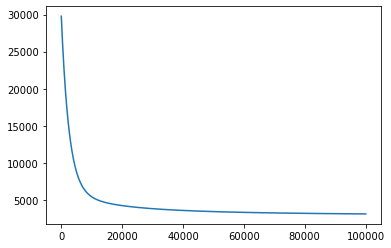

In [259]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [260]:
W, b

(array([  54.00801435, -187.97652341,  446.76733911,  270.90671724,
         -37.72470665,  -74.76647684, -237.49629117,  133.31169568,
         340.72444827,  188.32527925]),
 154.91887907842323)

In [261]:
lr_1= 0.01

In [262]:
losses_1 = []

for i in range(1, 100000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= lr_1 * dW
    b -= lr_1 * db
    L = loss(X_train, W, b, y_train)
    losses_1.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 3107.7866
Iteration 20 : Loss 3105.0889
Iteration 30 : Loss 3102.4623
Iteration 40 : Loss 3099.9047
Iteration 50 : Loss 3097.4143
Iteration 60 : Loss 3094.9891
Iteration 70 : Loss 3092.6273
Iteration 80 : Loss 3090.3272
Iteration 90 : Loss 3088.0870
Iteration 100 : Loss 3085.9051
Iteration 110 : Loss 3083.7799
Iteration 120 : Loss 3081.7098
Iteration 130 : Loss 3079.6933
Iteration 140 : Loss 3077.7289
Iteration 150 : Loss 3075.8152
Iteration 160 : Loss 3073.9509
Iteration 170 : Loss 3072.1345
Iteration 180 : Loss 3070.3649
Iteration 190 : Loss 3068.6406
Iteration 200 : Loss 3066.9605
Iteration 210 : Loss 3065.3234
Iteration 220 : Loss 3063.7281
Iteration 230 : Loss 3062.1736
Iteration 240 : Loss 3060.6587
Iteration 250 : Loss 3059.1823
Iteration 260 : Loss 3057.7434
Iteration 270 : Loss 3056.3410
Iteration 280 : Loss 3054.9742
Iteration 290 : Loss 3053.6420
Iteration 300 : Loss 3052.3435
Iteration 310 : Loss 3051.0777
Iteration 320 : Loss 3049.8439
Iteration 330 : L

Iteration 3110 : Loss 2998.8680
Iteration 3120 : Loss 2998.8605
Iteration 3130 : Loss 2998.8530
Iteration 3140 : Loss 2998.8456
Iteration 3150 : Loss 2998.8382
Iteration 3160 : Loss 2998.8309
Iteration 3170 : Loss 2998.8236
Iteration 3180 : Loss 2998.8164
Iteration 3190 : Loss 2998.8092
Iteration 3200 : Loss 2998.8021
Iteration 3210 : Loss 2998.7950
Iteration 3220 : Loss 2998.7879
Iteration 3230 : Loss 2998.7810
Iteration 3240 : Loss 2998.7740
Iteration 3250 : Loss 2998.7671
Iteration 3260 : Loss 2998.7603
Iteration 3270 : Loss 2998.7534
Iteration 3280 : Loss 2998.7467
Iteration 3290 : Loss 2998.7399
Iteration 3300 : Loss 2998.7332
Iteration 3310 : Loss 2998.7266
Iteration 3320 : Loss 2998.7200
Iteration 3330 : Loss 2998.7134
Iteration 3340 : Loss 2998.7068
Iteration 3350 : Loss 2998.7003
Iteration 3360 : Loss 2998.6939
Iteration 3370 : Loss 2998.6874
Iteration 3380 : Loss 2998.6810
Iteration 3390 : Loss 2998.6747
Iteration 3400 : Loss 2998.6684
Iteration 3410 : Loss 2998.6621
Iteratio

Iteration 7130 : Loss 2997.1313
Iteration 7140 : Loss 2997.1282
Iteration 7150 : Loss 2997.1250
Iteration 7160 : Loss 2997.1219
Iteration 7170 : Loss 2997.1188
Iteration 7180 : Loss 2997.1156
Iteration 7190 : Loss 2997.1125
Iteration 7200 : Loss 2997.1094
Iteration 7210 : Loss 2997.1063
Iteration 7220 : Loss 2997.1031
Iteration 7230 : Loss 2997.1000
Iteration 7240 : Loss 2997.0969
Iteration 7250 : Loss 2997.0938
Iteration 7260 : Loss 2997.0907
Iteration 7270 : Loss 2997.0876
Iteration 7280 : Loss 2997.0845
Iteration 7290 : Loss 2997.0814
Iteration 7300 : Loss 2997.0783
Iteration 7310 : Loss 2997.0752
Iteration 7320 : Loss 2997.0721
Iteration 7330 : Loss 2997.0690
Iteration 7340 : Loss 2997.0660
Iteration 7350 : Loss 2997.0629
Iteration 7360 : Loss 2997.0598
Iteration 7370 : Loss 2997.0567
Iteration 7380 : Loss 2997.0537
Iteration 7390 : Loss 2997.0506
Iteration 7400 : Loss 2997.0476
Iteration 7410 : Loss 2997.0445
Iteration 7420 : Loss 2997.0414
Iteration 7430 : Loss 2997.0384
Iteratio

Iteration 12990 : Loss 2995.7262
Iteration 13000 : Loss 2995.7244
Iteration 13010 : Loss 2995.7225
Iteration 13020 : Loss 2995.7207
Iteration 13030 : Loss 2995.7189
Iteration 13040 : Loss 2995.7171
Iteration 13050 : Loss 2995.7153
Iteration 13060 : Loss 2995.7135
Iteration 13070 : Loss 2995.7116
Iteration 13080 : Loss 2995.7098
Iteration 13090 : Loss 2995.7080
Iteration 13100 : Loss 2995.7062
Iteration 13110 : Loss 2995.7044
Iteration 13120 : Loss 2995.7026
Iteration 13130 : Loss 2995.7008
Iteration 13140 : Loss 2995.6990
Iteration 13150 : Loss 2995.6972
Iteration 13160 : Loss 2995.6954
Iteration 13170 : Loss 2995.6936
Iteration 13180 : Loss 2995.6918
Iteration 13190 : Loss 2995.6900
Iteration 13200 : Loss 2995.6882
Iteration 13210 : Loss 2995.6864
Iteration 13220 : Loss 2995.6846
Iteration 13230 : Loss 2995.6828
Iteration 13240 : Loss 2995.6810
Iteration 13250 : Loss 2995.6792
Iteration 13260 : Loss 2995.6774
Iteration 13270 : Loss 2995.6757
Iteration 13280 : Loss 2995.6739
Iteration 

Iteration 17250 : Loss 2995.0612
Iteration 17260 : Loss 2995.0599
Iteration 17270 : Loss 2995.0585
Iteration 17280 : Loss 2995.0572
Iteration 17290 : Loss 2995.0559
Iteration 17300 : Loss 2995.0545
Iteration 17310 : Loss 2995.0532
Iteration 17320 : Loss 2995.0519
Iteration 17330 : Loss 2995.0505
Iteration 17340 : Loss 2995.0492
Iteration 17350 : Loss 2995.0479
Iteration 17360 : Loss 2995.0465
Iteration 17370 : Loss 2995.0452
Iteration 17380 : Loss 2995.0439
Iteration 17390 : Loss 2995.0425
Iteration 17400 : Loss 2995.0412
Iteration 17410 : Loss 2995.0399
Iteration 17420 : Loss 2995.0386
Iteration 17430 : Loss 2995.0372
Iteration 17440 : Loss 2995.0359
Iteration 17450 : Loss 2995.0346
Iteration 17460 : Loss 2995.0333
Iteration 17470 : Loss 2995.0319
Iteration 17480 : Loss 2995.0306
Iteration 17490 : Loss 2995.0293
Iteration 17500 : Loss 2995.0280
Iteration 17510 : Loss 2995.0267
Iteration 17520 : Loss 2995.0253
Iteration 17530 : Loss 2995.0240
Iteration 17540 : Loss 2995.0227
Iteration 

Iteration 25340 : Loss 2994.1875
Iteration 25350 : Loss 2994.1867
Iteration 25360 : Loss 2994.1858
Iteration 25370 : Loss 2994.1849
Iteration 25380 : Loss 2994.1840
Iteration 25390 : Loss 2994.1831
Iteration 25400 : Loss 2994.1822
Iteration 25410 : Loss 2994.1813
Iteration 25420 : Loss 2994.1805
Iteration 25430 : Loss 2994.1796
Iteration 25440 : Loss 2994.1787
Iteration 25450 : Loss 2994.1778
Iteration 25460 : Loss 2994.1769
Iteration 25470 : Loss 2994.1761
Iteration 25480 : Loss 2994.1752
Iteration 25490 : Loss 2994.1743
Iteration 25500 : Loss 2994.1734
Iteration 25510 : Loss 2994.1725
Iteration 25520 : Loss 2994.1716
Iteration 25530 : Loss 2994.1708
Iteration 25540 : Loss 2994.1699
Iteration 25550 : Loss 2994.1690
Iteration 25560 : Loss 2994.1681
Iteration 25570 : Loss 2994.1673
Iteration 25580 : Loss 2994.1664
Iteration 25590 : Loss 2994.1655
Iteration 25600 : Loss 2994.1646
Iteration 25610 : Loss 2994.1637
Iteration 25620 : Loss 2994.1629
Iteration 25630 : Loss 2994.1620
Iteration 

Iteration 31900 : Loss 2993.6701
Iteration 31910 : Loss 2993.6694
Iteration 31920 : Loss 2993.6687
Iteration 31930 : Loss 2993.6680
Iteration 31940 : Loss 2993.6672
Iteration 31950 : Loss 2993.6665
Iteration 31960 : Loss 2993.6658
Iteration 31970 : Loss 2993.6651
Iteration 31980 : Loss 2993.6644
Iteration 31990 : Loss 2993.6637
Iteration 32000 : Loss 2993.6630
Iteration 32010 : Loss 2993.6623
Iteration 32020 : Loss 2993.6616
Iteration 32030 : Loss 2993.6609
Iteration 32040 : Loss 2993.6602
Iteration 32050 : Loss 2993.6595
Iteration 32060 : Loss 2993.6588
Iteration 32070 : Loss 2993.6581
Iteration 32080 : Loss 2993.6574
Iteration 32090 : Loss 2993.6567
Iteration 32100 : Loss 2993.6560
Iteration 32110 : Loss 2993.6553
Iteration 32120 : Loss 2993.6546
Iteration 32130 : Loss 2993.6539
Iteration 32140 : Loss 2993.6532
Iteration 32150 : Loss 2993.6525
Iteration 32160 : Loss 2993.6518
Iteration 32170 : Loss 2993.6510
Iteration 32180 : Loss 2993.6503
Iteration 32190 : Loss 2993.6496
Iteration 

Iteration 36950 : Loss 2993.3368
Iteration 36960 : Loss 2993.3362
Iteration 36970 : Loss 2993.3356
Iteration 36980 : Loss 2993.3350
Iteration 36990 : Loss 2993.3344
Iteration 37000 : Loss 2993.3338
Iteration 37010 : Loss 2993.3332
Iteration 37020 : Loss 2993.3325
Iteration 37030 : Loss 2993.3319
Iteration 37040 : Loss 2993.3313
Iteration 37050 : Loss 2993.3307
Iteration 37060 : Loss 2993.3301
Iteration 37070 : Loss 2993.3295
Iteration 37080 : Loss 2993.3288
Iteration 37090 : Loss 2993.3282
Iteration 37100 : Loss 2993.3276
Iteration 37110 : Loss 2993.3270
Iteration 37120 : Loss 2993.3264
Iteration 37130 : Loss 2993.3258
Iteration 37140 : Loss 2993.3252
Iteration 37150 : Loss 2993.3245
Iteration 37160 : Loss 2993.3239
Iteration 37170 : Loss 2993.3233
Iteration 37180 : Loss 2993.3227
Iteration 37190 : Loss 2993.3221
Iteration 37200 : Loss 2993.3215
Iteration 37210 : Loss 2993.3209
Iteration 37220 : Loss 2993.3203
Iteration 37230 : Loss 2993.3196
Iteration 37240 : Loss 2993.3190
Iteration 

Iteration 46090 : Loss 2992.8300
Iteration 46100 : Loss 2992.8295
Iteration 46110 : Loss 2992.8290
Iteration 46120 : Loss 2992.8285
Iteration 46130 : Loss 2992.8280
Iteration 46140 : Loss 2992.8275
Iteration 46150 : Loss 2992.8270
Iteration 46160 : Loss 2992.8265
Iteration 46170 : Loss 2992.8260
Iteration 46180 : Loss 2992.8255
Iteration 46190 : Loss 2992.8250
Iteration 46200 : Loss 2992.8245
Iteration 46210 : Loss 2992.8240
Iteration 46220 : Loss 2992.8235
Iteration 46230 : Loss 2992.8230
Iteration 46240 : Loss 2992.8225
Iteration 46250 : Loss 2992.8220
Iteration 46260 : Loss 2992.8215
Iteration 46270 : Loss 2992.8210
Iteration 46280 : Loss 2992.8205
Iteration 46290 : Loss 2992.8200
Iteration 46300 : Loss 2992.8195
Iteration 46310 : Loss 2992.8190
Iteration 46320 : Loss 2992.8185
Iteration 46330 : Loss 2992.8180
Iteration 46340 : Loss 2992.8175
Iteration 46350 : Loss 2992.8170
Iteration 46360 : Loss 2992.8165
Iteration 46370 : Loss 2992.8160
Iteration 46380 : Loss 2992.8155
Iteration 

Iteration 60920 : Loss 2992.1931
Iteration 60930 : Loss 2992.1928
Iteration 60940 : Loss 2992.1924
Iteration 60950 : Loss 2992.1920
Iteration 60960 : Loss 2992.1917
Iteration 60970 : Loss 2992.1913
Iteration 60980 : Loss 2992.1909
Iteration 60990 : Loss 2992.1906
Iteration 61000 : Loss 2992.1902
Iteration 61010 : Loss 2992.1898
Iteration 61020 : Loss 2992.1895
Iteration 61030 : Loss 2992.1891
Iteration 61040 : Loss 2992.1887
Iteration 61050 : Loss 2992.1884
Iteration 61060 : Loss 2992.1880
Iteration 61070 : Loss 2992.1876
Iteration 61080 : Loss 2992.1873
Iteration 61090 : Loss 2992.1869
Iteration 61100 : Loss 2992.1865
Iteration 61110 : Loss 2992.1862
Iteration 61120 : Loss 2992.1858
Iteration 61130 : Loss 2992.1854
Iteration 61140 : Loss 2992.1851
Iteration 61150 : Loss 2992.1847
Iteration 61160 : Loss 2992.1843
Iteration 61170 : Loss 2992.1840
Iteration 61180 : Loss 2992.1836
Iteration 61190 : Loss 2992.1832
Iteration 61200 : Loss 2992.1829
Iteration 61210 : Loss 2992.1825
Iteration 

Iteration 66500 : Loss 2991.9992
Iteration 66510 : Loss 2991.9988
Iteration 66520 : Loss 2991.9985
Iteration 66530 : Loss 2991.9982
Iteration 66540 : Loss 2991.9978
Iteration 66550 : Loss 2991.9975
Iteration 66560 : Loss 2991.9972
Iteration 66570 : Loss 2991.9969
Iteration 66580 : Loss 2991.9965
Iteration 66590 : Loss 2991.9962
Iteration 66600 : Loss 2991.9959
Iteration 66610 : Loss 2991.9955
Iteration 66620 : Loss 2991.9952
Iteration 66630 : Loss 2991.9949
Iteration 66640 : Loss 2991.9946
Iteration 66650 : Loss 2991.9942
Iteration 66660 : Loss 2991.9939
Iteration 66670 : Loss 2991.9936
Iteration 66680 : Loss 2991.9933
Iteration 66690 : Loss 2991.9929
Iteration 66700 : Loss 2991.9926
Iteration 66710 : Loss 2991.9923
Iteration 66720 : Loss 2991.9919
Iteration 66730 : Loss 2991.9916
Iteration 66740 : Loss 2991.9913
Iteration 66750 : Loss 2991.9910
Iteration 66760 : Loss 2991.9906
Iteration 66770 : Loss 2991.9903
Iteration 66780 : Loss 2991.9900
Iteration 66790 : Loss 2991.9897
Iteration 

Iteration 72950 : Loss 2991.8004
Iteration 72960 : Loss 2991.8001
Iteration 72970 : Loss 2991.7998
Iteration 72980 : Loss 2991.7995
Iteration 72990 : Loss 2991.7992
Iteration 73000 : Loss 2991.7990
Iteration 73010 : Loss 2991.7987
Iteration 73020 : Loss 2991.7984
Iteration 73030 : Loss 2991.7981
Iteration 73040 : Loss 2991.7978
Iteration 73050 : Loss 2991.7975
Iteration 73060 : Loss 2991.7972
Iteration 73070 : Loss 2991.7969
Iteration 73080 : Loss 2991.7967
Iteration 73090 : Loss 2991.7964
Iteration 73100 : Loss 2991.7961
Iteration 73110 : Loss 2991.7958
Iteration 73120 : Loss 2991.7955
Iteration 73130 : Loss 2991.7952
Iteration 73140 : Loss 2991.7949
Iteration 73150 : Loss 2991.7946
Iteration 73160 : Loss 2991.7944
Iteration 73170 : Loss 2991.7941
Iteration 73180 : Loss 2991.7938
Iteration 73190 : Loss 2991.7935
Iteration 73200 : Loss 2991.7932
Iteration 73210 : Loss 2991.7929
Iteration 73220 : Loss 2991.7926
Iteration 73230 : Loss 2991.7923
Iteration 73240 : Loss 2991.7921
Iteration 

Iteration 77390 : Loss 2991.6777
Iteration 77400 : Loss 2991.6775
Iteration 77410 : Loss 2991.6772
Iteration 77420 : Loss 2991.6770
Iteration 77430 : Loss 2991.6767
Iteration 77440 : Loss 2991.6764
Iteration 77450 : Loss 2991.6762
Iteration 77460 : Loss 2991.6759
Iteration 77470 : Loss 2991.6756
Iteration 77480 : Loss 2991.6754
Iteration 77490 : Loss 2991.6751
Iteration 77500 : Loss 2991.6748
Iteration 77510 : Loss 2991.6746
Iteration 77520 : Loss 2991.6743
Iteration 77530 : Loss 2991.6740
Iteration 77540 : Loss 2991.6738
Iteration 77550 : Loss 2991.6735
Iteration 77560 : Loss 2991.6733
Iteration 77570 : Loss 2991.6730
Iteration 77580 : Loss 2991.6727
Iteration 77590 : Loss 2991.6725
Iteration 77600 : Loss 2991.6722
Iteration 77610 : Loss 2991.6719
Iteration 77620 : Loss 2991.6717
Iteration 77630 : Loss 2991.6714
Iteration 77640 : Loss 2991.6712
Iteration 77650 : Loss 2991.6709
Iteration 77660 : Loss 2991.6706
Iteration 77670 : Loss 2991.6704
Iteration 77680 : Loss 2991.6701
Iteration 

Iteration 88760 : Loss 2991.4090
Iteration 88770 : Loss 2991.4088
Iteration 88780 : Loss 2991.4086
Iteration 88790 : Loss 2991.4084
Iteration 88800 : Loss 2991.4082
Iteration 88810 : Loss 2991.4079
Iteration 88820 : Loss 2991.4077
Iteration 88830 : Loss 2991.4075
Iteration 88840 : Loss 2991.4073
Iteration 88850 : Loss 2991.4071
Iteration 88860 : Loss 2991.4069
Iteration 88870 : Loss 2991.4067
Iteration 88880 : Loss 2991.4065
Iteration 88890 : Loss 2991.4063
Iteration 88900 : Loss 2991.4061
Iteration 88910 : Loss 2991.4058
Iteration 88920 : Loss 2991.4056
Iteration 88930 : Loss 2991.4054
Iteration 88940 : Loss 2991.4052
Iteration 88950 : Loss 2991.4050
Iteration 88960 : Loss 2991.4048
Iteration 88970 : Loss 2991.4046
Iteration 88980 : Loss 2991.4044
Iteration 88990 : Loss 2991.4042
Iteration 89000 : Loss 2991.4040
Iteration 89010 : Loss 2991.4038
Iteration 89020 : Loss 2991.4035
Iteration 89030 : Loss 2991.4033
Iteration 89040 : Loss 2991.4031
Iteration 89050 : Loss 2991.4029
Iteration 

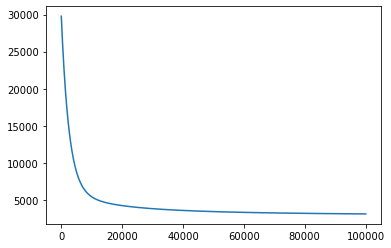

In [263]:
plt.plot(losses)
plt.show()

In [264]:
W, b

(array([  59.05975454, -320.48708727,  553.53191475,  296.86349942,
        -338.83609175,  121.1632286 , -252.81134947,   27.43853732,
         532.354893  ,  151.43454008]),
 155.15228657312693)

In [265]:
lr_2= 0.00001


In [266]:
losses_2 = []

for i in range(5, 100000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= lr_2 * dW
    b -= lr_2 * db
    L = loss(X_train, W, b, y_train)
    losses_2.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2991.1970
Iteration 20 : Loss 2991.1970
Iteration 30 : Loss 2991.1970
Iteration 40 : Loss 2991.1970
Iteration 50 : Loss 2991.1970
Iteration 60 : Loss 2991.1970
Iteration 70 : Loss 2991.1970
Iteration 80 : Loss 2991.1970
Iteration 90 : Loss 2991.1970
Iteration 100 : Loss 2991.1970
Iteration 110 : Loss 2991.1970
Iteration 120 : Loss 2991.1970
Iteration 130 : Loss 2991.1970
Iteration 140 : Loss 2991.1970
Iteration 150 : Loss 2991.1970
Iteration 160 : Loss 2991.1970
Iteration 170 : Loss 2991.1970
Iteration 180 : Loss 2991.1970
Iteration 190 : Loss 2991.1970
Iteration 200 : Loss 2991.1970
Iteration 210 : Loss 2991.1970
Iteration 220 : Loss 2991.1970
Iteration 230 : Loss 2991.1970
Iteration 240 : Loss 2991.1970
Iteration 250 : Loss 2991.1970
Iteration 260 : Loss 2991.1970
Iteration 270 : Loss 2991.1970
Iteration 280 : Loss 2991.1970
Iteration 290 : Loss 2991.1970
Iteration 300 : Loss 2991.1970
Iteration 310 : Loss 2991.1970
Iteration 320 : Loss 2991.1970
Iteration 330 : L

Iteration 3480 : Loss 2991.1969
Iteration 3490 : Loss 2991.1969
Iteration 3500 : Loss 2991.1969
Iteration 3510 : Loss 2991.1969
Iteration 3520 : Loss 2991.1969
Iteration 3530 : Loss 2991.1969
Iteration 3540 : Loss 2991.1969
Iteration 3550 : Loss 2991.1969
Iteration 3560 : Loss 2991.1969
Iteration 3570 : Loss 2991.1969
Iteration 3580 : Loss 2991.1969
Iteration 3590 : Loss 2991.1969
Iteration 3600 : Loss 2991.1969
Iteration 3610 : Loss 2991.1969
Iteration 3620 : Loss 2991.1969
Iteration 3630 : Loss 2991.1969
Iteration 3640 : Loss 2991.1969
Iteration 3650 : Loss 2991.1969
Iteration 3660 : Loss 2991.1969
Iteration 3670 : Loss 2991.1969
Iteration 3680 : Loss 2991.1969
Iteration 3690 : Loss 2991.1969
Iteration 3700 : Loss 2991.1969
Iteration 3710 : Loss 2991.1969
Iteration 3720 : Loss 2991.1969
Iteration 3730 : Loss 2991.1969
Iteration 3740 : Loss 2991.1969
Iteration 3750 : Loss 2991.1969
Iteration 3760 : Loss 2991.1969
Iteration 3770 : Loss 2991.1969
Iteration 3780 : Loss 2991.1969
Iteratio

Iteration 9610 : Loss 2991.1968
Iteration 9620 : Loss 2991.1968
Iteration 9630 : Loss 2991.1968
Iteration 9640 : Loss 2991.1968
Iteration 9650 : Loss 2991.1968
Iteration 9660 : Loss 2991.1968
Iteration 9670 : Loss 2991.1968
Iteration 9680 : Loss 2991.1968
Iteration 9690 : Loss 2991.1968
Iteration 9700 : Loss 2991.1968
Iteration 9710 : Loss 2991.1968
Iteration 9720 : Loss 2991.1968
Iteration 9730 : Loss 2991.1968
Iteration 9740 : Loss 2991.1968
Iteration 9750 : Loss 2991.1968
Iteration 9760 : Loss 2991.1968
Iteration 9770 : Loss 2991.1968
Iteration 9780 : Loss 2991.1968
Iteration 9790 : Loss 2991.1968
Iteration 9800 : Loss 2991.1968
Iteration 9810 : Loss 2991.1968
Iteration 9820 : Loss 2991.1968
Iteration 9830 : Loss 2991.1968
Iteration 9840 : Loss 2991.1968
Iteration 9850 : Loss 2991.1968
Iteration 9860 : Loss 2991.1968
Iteration 9870 : Loss 2991.1968
Iteration 9880 : Loss 2991.1968
Iteration 9890 : Loss 2991.1968
Iteration 9900 : Loss 2991.1968
Iteration 9910 : Loss 2991.1968
Iteratio

Iteration 15970 : Loss 2991.1967
Iteration 15980 : Loss 2991.1967
Iteration 15990 : Loss 2991.1967
Iteration 16000 : Loss 2991.1967
Iteration 16010 : Loss 2991.1967
Iteration 16020 : Loss 2991.1967
Iteration 16030 : Loss 2991.1967
Iteration 16040 : Loss 2991.1967
Iteration 16050 : Loss 2991.1967
Iteration 16060 : Loss 2991.1967
Iteration 16070 : Loss 2991.1967
Iteration 16080 : Loss 2991.1967
Iteration 16090 : Loss 2991.1967
Iteration 16100 : Loss 2991.1967
Iteration 16110 : Loss 2991.1967
Iteration 16120 : Loss 2991.1967
Iteration 16130 : Loss 2991.1967
Iteration 16140 : Loss 2991.1967
Iteration 16150 : Loss 2991.1967
Iteration 16160 : Loss 2991.1967
Iteration 16170 : Loss 2991.1967
Iteration 16180 : Loss 2991.1967
Iteration 16190 : Loss 2991.1967
Iteration 16200 : Loss 2991.1967
Iteration 16210 : Loss 2991.1967
Iteration 16220 : Loss 2991.1967
Iteration 16230 : Loss 2991.1967
Iteration 16240 : Loss 2991.1967
Iteration 16250 : Loss 2991.1967
Iteration 16260 : Loss 2991.1967
Iteration 

Iteration 25180 : Loss 2991.1966
Iteration 25190 : Loss 2991.1966
Iteration 25200 : Loss 2991.1966
Iteration 25210 : Loss 2991.1966
Iteration 25220 : Loss 2991.1966
Iteration 25230 : Loss 2991.1966
Iteration 25240 : Loss 2991.1966
Iteration 25250 : Loss 2991.1966
Iteration 25260 : Loss 2991.1966
Iteration 25270 : Loss 2991.1966
Iteration 25280 : Loss 2991.1966
Iteration 25290 : Loss 2991.1966
Iteration 25300 : Loss 2991.1966
Iteration 25310 : Loss 2991.1966
Iteration 25320 : Loss 2991.1966
Iteration 25330 : Loss 2991.1966
Iteration 25340 : Loss 2991.1966
Iteration 25350 : Loss 2991.1966
Iteration 25360 : Loss 2991.1966
Iteration 25370 : Loss 2991.1966
Iteration 25380 : Loss 2991.1966
Iteration 25390 : Loss 2991.1966
Iteration 25400 : Loss 2991.1966
Iteration 25410 : Loss 2991.1966
Iteration 25420 : Loss 2991.1966
Iteration 25430 : Loss 2991.1966
Iteration 25440 : Loss 2991.1966
Iteration 25450 : Loss 2991.1966
Iteration 25460 : Loss 2991.1966
Iteration 25470 : Loss 2991.1966
Iteration 

Iteration 37650 : Loss 2991.1964
Iteration 37660 : Loss 2991.1964
Iteration 37670 : Loss 2991.1964
Iteration 37680 : Loss 2991.1964
Iteration 37690 : Loss 2991.1964
Iteration 37700 : Loss 2991.1964
Iteration 37710 : Loss 2991.1964
Iteration 37720 : Loss 2991.1964
Iteration 37730 : Loss 2991.1964
Iteration 37740 : Loss 2991.1964
Iteration 37750 : Loss 2991.1964
Iteration 37760 : Loss 2991.1964
Iteration 37770 : Loss 2991.1964
Iteration 37780 : Loss 2991.1964
Iteration 37790 : Loss 2991.1964
Iteration 37800 : Loss 2991.1964
Iteration 37810 : Loss 2991.1964
Iteration 37820 : Loss 2991.1964
Iteration 37830 : Loss 2991.1964
Iteration 37840 : Loss 2991.1964
Iteration 37850 : Loss 2991.1964
Iteration 37860 : Loss 2991.1964
Iteration 37870 : Loss 2991.1964
Iteration 37880 : Loss 2991.1964
Iteration 37890 : Loss 2991.1964
Iteration 37900 : Loss 2991.1964
Iteration 37910 : Loss 2991.1964
Iteration 37920 : Loss 2991.1964
Iteration 37930 : Loss 2991.1964
Iteration 37940 : Loss 2991.1964
Iteration 

Iteration 41650 : Loss 2991.1963
Iteration 41660 : Loss 2991.1963
Iteration 41670 : Loss 2991.1963
Iteration 41680 : Loss 2991.1963
Iteration 41690 : Loss 2991.1963
Iteration 41700 : Loss 2991.1963
Iteration 41710 : Loss 2991.1963
Iteration 41720 : Loss 2991.1963
Iteration 41730 : Loss 2991.1963
Iteration 41740 : Loss 2991.1963
Iteration 41750 : Loss 2991.1963
Iteration 41760 : Loss 2991.1963
Iteration 41770 : Loss 2991.1963
Iteration 41780 : Loss 2991.1963
Iteration 41790 : Loss 2991.1963
Iteration 41800 : Loss 2991.1963
Iteration 41810 : Loss 2991.1963
Iteration 41820 : Loss 2991.1963
Iteration 41830 : Loss 2991.1963
Iteration 41840 : Loss 2991.1963
Iteration 41850 : Loss 2991.1963
Iteration 41860 : Loss 2991.1963
Iteration 41870 : Loss 2991.1963
Iteration 41880 : Loss 2991.1963
Iteration 41890 : Loss 2991.1963
Iteration 41900 : Loss 2991.1963
Iteration 41910 : Loss 2991.1963
Iteration 41920 : Loss 2991.1963
Iteration 41930 : Loss 2991.1963
Iteration 41940 : Loss 2991.1963
Iteration 

Iteration 47280 : Loss 2991.1962
Iteration 47290 : Loss 2991.1962
Iteration 47300 : Loss 2991.1962
Iteration 47310 : Loss 2991.1962
Iteration 47320 : Loss 2991.1962
Iteration 47330 : Loss 2991.1962
Iteration 47340 : Loss 2991.1962
Iteration 47350 : Loss 2991.1962
Iteration 47360 : Loss 2991.1962
Iteration 47370 : Loss 2991.1962
Iteration 47380 : Loss 2991.1962
Iteration 47390 : Loss 2991.1962
Iteration 47400 : Loss 2991.1962
Iteration 47410 : Loss 2991.1962
Iteration 47420 : Loss 2991.1962
Iteration 47430 : Loss 2991.1962
Iteration 47440 : Loss 2991.1962
Iteration 47450 : Loss 2991.1962
Iteration 47460 : Loss 2991.1962
Iteration 47470 : Loss 2991.1962
Iteration 47480 : Loss 2991.1962
Iteration 47490 : Loss 2991.1962
Iteration 47500 : Loss 2991.1962
Iteration 47510 : Loss 2991.1962
Iteration 47520 : Loss 2991.1962
Iteration 47530 : Loss 2991.1962
Iteration 47540 : Loss 2991.1962
Iteration 47550 : Loss 2991.1962
Iteration 47560 : Loss 2991.1962
Iteration 47570 : Loss 2991.1962
Iteration 

Iteration 55200 : Loss 2991.1961
Iteration 55210 : Loss 2991.1961
Iteration 55220 : Loss 2991.1961
Iteration 55230 : Loss 2991.1961
Iteration 55240 : Loss 2991.1961
Iteration 55250 : Loss 2991.1961
Iteration 55260 : Loss 2991.1961
Iteration 55270 : Loss 2991.1961
Iteration 55280 : Loss 2991.1961
Iteration 55290 : Loss 2991.1961
Iteration 55300 : Loss 2991.1961
Iteration 55310 : Loss 2991.1961
Iteration 55320 : Loss 2991.1961
Iteration 55330 : Loss 2991.1961
Iteration 55340 : Loss 2991.1961
Iteration 55350 : Loss 2991.1961
Iteration 55360 : Loss 2991.1961
Iteration 55370 : Loss 2991.1961
Iteration 55380 : Loss 2991.1961
Iteration 55390 : Loss 2991.1961
Iteration 55400 : Loss 2991.1961
Iteration 55410 : Loss 2991.1961
Iteration 55420 : Loss 2991.1961
Iteration 55430 : Loss 2991.1961
Iteration 55440 : Loss 2991.1961
Iteration 55450 : Loss 2991.1961
Iteration 55460 : Loss 2991.1961
Iteration 55470 : Loss 2991.1961
Iteration 55480 : Loss 2991.1961
Iteration 55490 : Loss 2991.1961
Iteration 

Iteration 62630 : Loss 2991.1959
Iteration 62640 : Loss 2991.1959
Iteration 62650 : Loss 2991.1959
Iteration 62660 : Loss 2991.1959
Iteration 62670 : Loss 2991.1959
Iteration 62680 : Loss 2991.1959
Iteration 62690 : Loss 2991.1959
Iteration 62700 : Loss 2991.1959
Iteration 62710 : Loss 2991.1959
Iteration 62720 : Loss 2991.1959
Iteration 62730 : Loss 2991.1959
Iteration 62740 : Loss 2991.1959
Iteration 62750 : Loss 2991.1959
Iteration 62760 : Loss 2991.1959
Iteration 62770 : Loss 2991.1959
Iteration 62780 : Loss 2991.1959
Iteration 62790 : Loss 2991.1959
Iteration 62800 : Loss 2991.1959
Iteration 62810 : Loss 2991.1959
Iteration 62820 : Loss 2991.1959
Iteration 62830 : Loss 2991.1959
Iteration 62840 : Loss 2991.1959
Iteration 62850 : Loss 2991.1959
Iteration 62860 : Loss 2991.1959
Iteration 62870 : Loss 2991.1959
Iteration 62880 : Loss 2991.1959
Iteration 62890 : Loss 2991.1959
Iteration 62900 : Loss 2991.1959
Iteration 62910 : Loss 2991.1959
Iteration 62920 : Loss 2991.1959
Iteration 

Iteration 70720 : Loss 2991.1958
Iteration 70730 : Loss 2991.1958
Iteration 70740 : Loss 2991.1958
Iteration 70750 : Loss 2991.1958
Iteration 70760 : Loss 2991.1958
Iteration 70770 : Loss 2991.1958
Iteration 70780 : Loss 2991.1958
Iteration 70790 : Loss 2991.1958
Iteration 70800 : Loss 2991.1958
Iteration 70810 : Loss 2991.1958
Iteration 70820 : Loss 2991.1958
Iteration 70830 : Loss 2991.1958
Iteration 70840 : Loss 2991.1958
Iteration 70850 : Loss 2991.1958
Iteration 70860 : Loss 2991.1958
Iteration 70870 : Loss 2991.1958
Iteration 70880 : Loss 2991.1958
Iteration 70890 : Loss 2991.1958
Iteration 70900 : Loss 2991.1958
Iteration 70910 : Loss 2991.1958
Iteration 70920 : Loss 2991.1958
Iteration 70930 : Loss 2991.1958
Iteration 70940 : Loss 2991.1958
Iteration 70950 : Loss 2991.1958
Iteration 70960 : Loss 2991.1958
Iteration 70970 : Loss 2991.1958
Iteration 70980 : Loss 2991.1958
Iteration 70990 : Loss 2991.1958
Iteration 71000 : Loss 2991.1958
Iteration 71010 : Loss 2991.1958
Iteration 

Iteration 75170 : Loss 2991.1957
Iteration 75180 : Loss 2991.1957
Iteration 75190 : Loss 2991.1957
Iteration 75200 : Loss 2991.1957
Iteration 75210 : Loss 2991.1957
Iteration 75220 : Loss 2991.1957
Iteration 75230 : Loss 2991.1957
Iteration 75240 : Loss 2991.1957
Iteration 75250 : Loss 2991.1957
Iteration 75260 : Loss 2991.1957
Iteration 75270 : Loss 2991.1957
Iteration 75280 : Loss 2991.1957
Iteration 75290 : Loss 2991.1957
Iteration 75300 : Loss 2991.1957
Iteration 75310 : Loss 2991.1957
Iteration 75320 : Loss 2991.1957
Iteration 75330 : Loss 2991.1957
Iteration 75340 : Loss 2991.1957
Iteration 75350 : Loss 2991.1957
Iteration 75360 : Loss 2991.1957
Iteration 75370 : Loss 2991.1957
Iteration 75380 : Loss 2991.1957
Iteration 75390 : Loss 2991.1957
Iteration 75400 : Loss 2991.1957
Iteration 75410 : Loss 2991.1957
Iteration 75420 : Loss 2991.1957
Iteration 75430 : Loss 2991.1957
Iteration 75440 : Loss 2991.1957
Iteration 75450 : Loss 2991.1957
Iteration 75460 : Loss 2991.1957
Iteration 

Iteration 83750 : Loss 2991.1956
Iteration 83760 : Loss 2991.1956
Iteration 83770 : Loss 2991.1956
Iteration 83780 : Loss 2991.1956
Iteration 83790 : Loss 2991.1956
Iteration 83800 : Loss 2991.1956
Iteration 83810 : Loss 2991.1956
Iteration 83820 : Loss 2991.1956
Iteration 83830 : Loss 2991.1956
Iteration 83840 : Loss 2991.1956
Iteration 83850 : Loss 2991.1956
Iteration 83860 : Loss 2991.1956
Iteration 83870 : Loss 2991.1956
Iteration 83880 : Loss 2991.1956
Iteration 83890 : Loss 2991.1956
Iteration 83900 : Loss 2991.1956
Iteration 83910 : Loss 2991.1956
Iteration 83920 : Loss 2991.1956
Iteration 83930 : Loss 2991.1956
Iteration 83940 : Loss 2991.1956
Iteration 83950 : Loss 2991.1956
Iteration 83960 : Loss 2991.1956
Iteration 83970 : Loss 2991.1956
Iteration 83980 : Loss 2991.1956
Iteration 83990 : Loss 2991.1956
Iteration 84000 : Loss 2991.1956
Iteration 84010 : Loss 2991.1956
Iteration 84020 : Loss 2991.1956
Iteration 84030 : Loss 2991.1956
Iteration 84040 : Loss 2991.1956
Iteration 

Iteration 93110 : Loss 2991.1954
Iteration 93120 : Loss 2991.1954
Iteration 93130 : Loss 2991.1954
Iteration 93140 : Loss 2991.1954
Iteration 93150 : Loss 2991.1954
Iteration 93160 : Loss 2991.1954
Iteration 93170 : Loss 2991.1954
Iteration 93180 : Loss 2991.1954
Iteration 93190 : Loss 2991.1954
Iteration 93200 : Loss 2991.1954
Iteration 93210 : Loss 2991.1954
Iteration 93220 : Loss 2991.1954
Iteration 93230 : Loss 2991.1954
Iteration 93240 : Loss 2991.1954
Iteration 93250 : Loss 2991.1954
Iteration 93260 : Loss 2991.1954
Iteration 93270 : Loss 2991.1954
Iteration 93280 : Loss 2991.1954
Iteration 93290 : Loss 2991.1954
Iteration 93300 : Loss 2991.1954
Iteration 93310 : Loss 2991.1954
Iteration 93320 : Loss 2991.1954
Iteration 93330 : Loss 2991.1954
Iteration 93340 : Loss 2991.1954
Iteration 93350 : Loss 2991.1954
Iteration 93360 : Loss 2991.1954
Iteration 93370 : Loss 2991.1954
Iteration 93380 : Loss 2991.1954
Iteration 93390 : Loss 2991.1954
Iteration 93400 : Loss 2991.1954
Iteration 

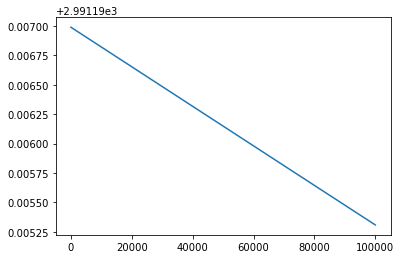

In [267]:
plt.plot(losses_2)
plt.show()

In [276]:
W, b

(array([  59.05904089, -320.48838251,  553.5295134 ,  296.86593886,
        -338.98537286,  121.28377058, -252.74520171,   27.45455615,
         532.41037552,  151.43158697]),
 155.1523257272001)

lerninglate 값을 달리해서 확인 해본 결과 500000 iteration에선 0.01의 learning rate가 가장 효과적인걸 볼수 있었다.

### Performance test / visualization

In [280]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [281]:
model.fit(X_train, y_train)

LinearRegression()

In [282]:
predictions = model.predict(X_test)
predictions

array([170.68701964, 178.83419889,  95.30716048, 132.27614286,
       122.55662388, 169.85006062, 224.6338737 , 157.17477638,
       208.85446891, 191.30701616,  89.14594287, 239.36425729,
       231.61978046,  68.49697845, 104.47816129,  62.03273853,
       116.31498034, 150.15780894, 178.79083475, 158.01740692,
       113.00672258, 150.40310083,  84.12838913, 187.74120396,
       142.87414701, 159.88276342, 297.12374342, 244.31842111,
       215.50658715, 291.33365073, 190.62449473, 128.22102873,
       219.12851646, 178.58274516, 151.1699163 , 116.1274236 ,
       196.85947147, 213.12162375, 103.01618142,  96.15688808,
       235.24023784,  97.17033864, 138.80573501, 163.37077069,
       130.65067866, 142.61703737, 174.64308579,  92.22805847,
       174.96520559, 234.37652715, 164.00266159, 151.33966918,
       174.41278456, 211.6763865 , 156.4526706 ,  92.77943494,
       123.22876695, 170.21839588, 165.36894239, 214.15363299,
       231.90937469, 164.3234114 , 188.3856265 , 110.53

In [283]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

2820.5881321960755

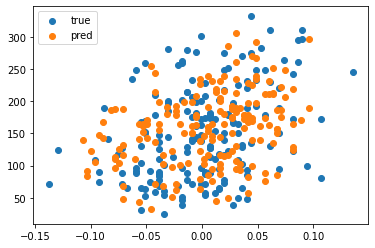

In [286]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

## 출처
https://www.robotstory.co.kr/raspberry/?mode=view&board_pid=63
https://blog.naver.com/complusblog/221239772515
